In [1]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.layers.advanced_activations import LeakyReLU
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [2]:
(input_train, target_train), (input_test, target_test) = mnist.load_data()

In [3]:
num_classes = 10

input_train = input_train.reshape(60000,784)
input_test = input_test.reshape(10000,784)
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

input_train /=255
input_test /=255

In [4]:
print("Input train: ",np.shape(input_train))
print("Target train: ",np.shape(input_test))

Input train:  (60000, 784)
Target train:  (10000, 784)


In [5]:
target_train = keras.utils.to_categorical(target_train, num_classes)
target_test = keras.utils.to_categorical(target_test, num_classes)

In [6]:
print("Input train: ",np.shape(target_train))
print("Target train: ",np.shape(target_test))

Input train:  (60000, 10)
Target train:  (10000, 10)


In [7]:
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [9]:
for layer in model.layers:
    print(layer.name, layer.input_shape,"=>",layer.output_shape)

dense_1 (None, 784) => (None, 512)
dropout_1 (None, 512) => (None, 512)
dense_2 (None, 512) => (None, 512)
dropout_2 (None, 512) => (None, 512)
dense_3 (None, 512) => (None, 10)


In [10]:
#I declared different optimizers with their default lr's here
#gd optimizer
gd = tensorflow.train.GradientDescentOptimizer(learning_rate=0.01)

#SGD opt without momentum
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

#SGD opt with momentum
sgd_mon = keras.optimizers.SGD(lr=0.01, momentum=0.01, decay=0.0, nesterov=False)

#adam optimizer
adam = keras.optimizers.Adam(lr=0.001)

#adamax optimizer
adamax = keras.optimizers.Adamax(lr=0.002)

#optimizers
optimizers = [gd, sgd, sgd_mon, adam, adamax]


In [12]:
#I Declared batch_size and epoch in every block to make it easier to modify them for every optimizer

#GD Optimizer
batch_size = 128
epochs = 100

model.compile(loss='categorical_crossentropy', 
              optimizer=gd,
              metrics=['accuracy'])

historyGD = model.fit(input_train, target_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data=(input_test, target_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 152us/step - loss: 0.4084 - acc: 0.8776 - val_loss: 0.2688 - val_acc: 0.9208
Epoch 2/100
60000/60000 [==============================] - 8s 138us/step - loss: 0.3799 - acc: 0.8873 - val_loss: 0.2549 - val_acc: 0.9239
Epoch 3/100
60000/60000 [==============================] - 8s 133us/step - loss: 0.3585 - acc: 0.8934 - val_loss: 0.2392 - val_acc: 0.9300
Epoch 4/100
60000/60000 [==============================] - 8s 132us/step - loss: 0.3388 - acc: 0.8999 - val_loss: 0.2292 - val_acc: 0.9338
Epoch 5/100
60000/60000 [==============================] - 8s 131us/step - loss: 0.3215 - acc: 0.9047 - val_loss: 0.2180 - val_acc: 0.9360
Epoch 6/100
60000/60000 [==============================] - 8s 129us/step - loss: 0.3090 - acc: 0.9081 - val_loss: 0.2083 - val_acc: 0.9395
Epoch 7/100
60000/60000 [==============================] - 8s 132us/step - loss: 0.2975 - acc: 0.9117 - val_loss: 0.

60000/60000 [==============================] - 7s 116us/step - loss: 0.1151 - acc: 0.9656 - val_loss: 0.0856 - val_acc: 0.9732
Epoch 60/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.1133 - acc: 0.9660 - val_loss: 0.0852 - val_acc: 0.9734
Epoch 61/100
60000/60000 [==============================] - 7s 112us/step - loss: 0.1132 - acc: 0.9664 - val_loss: 0.0842 - val_acc: 0.9741
Epoch 62/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.1127 - acc: 0.9660 - val_loss: 0.0834 - val_acc: 0.9738
Epoch 63/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.1113 - acc: 0.9666 - val_loss: 0.0833 - val_acc: 0.9740
Epoch 64/100
60000/60000 [==============================] - 7s 113us/step - loss: 0.1083 - acc: 0.9675 - val_loss: 0.0826 - val_acc: 0.9747
Epoch 65/100
60000/60000 [==============================] - 7s 115us/step - loss: 0.1068 - acc: 0.9687 - val_loss: 0.0824 - val_acc: 0.9742
Epoch 66/100
60000/60000 [=======

In [13]:
#SGD without momentum
batch_size = 128
epochs = 100

model.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])

historySGD = model.fit(input_train, target_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data=(input_test, target_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 10s 160us/step - loss: 0.0784 - acc: 0.9756 - val_loss: 0.0692 - val_acc: 0.9784
Epoch 2/100
60000/60000 [==============================] - 9s 154us/step - loss: 0.0785 - acc: 0.9761 - val_loss: 0.0692 - val_acc: 0.9788
Epoch 3/100
60000/60000 [==============================] - 9s 156us/step - loss: 0.0775 - acc: 0.9764 - val_loss: 0.0688 - val_acc: 0.9789
Epoch 4/100
60000/60000 [==============================] - 9s 144us/step - loss: 0.0770 - acc: 0.9770 - val_loss: 0.0687 - val_acc: 0.9791
Epoch 5/100
60000/60000 [==============================] - 9s 152us/step - loss: 0.0759 - acc: 0.9768 - val_loss: 0.0690 - val_acc: 0.9788
Epoch 6/100
60000/60000 [==============================] - 9s 148us/step - loss: 0.0777 - acc: 0.9763 - val_loss: 0.0686 - val_acc: 0.9786
Epoch 7/100
60000/60000 [==============================] - 9s 148us/step - loss: 0.0759 - acc: 0.9768 - val_loss: 0

60000/60000 [==============================] - 8s 131us/step - loss: 0.0550 - acc: 0.9824 - val_loss: 0.0603 - val_acc: 0.9814
Epoch 60/100
60000/60000 [==============================] - 8s 134us/step - loss: 0.0538 - acc: 0.9831 - val_loss: 0.0607 - val_acc: 0.9806
Epoch 61/100
60000/60000 [==============================] - 8s 130us/step - loss: 0.0531 - acc: 0.9835 - val_loss: 0.0610 - val_acc: 0.9811
Epoch 62/100
60000/60000 [==============================] - 8s 132us/step - loss: 0.0549 - acc: 0.9825 - val_loss: 0.0608 - val_acc: 0.9805
Epoch 63/100
60000/60000 [==============================] - 8s 134us/step - loss: 0.0519 - acc: 0.9843 - val_loss: 0.0606 - val_acc: 0.9811
Epoch 64/100
60000/60000 [==============================] - 8s 129us/step - loss: 0.0529 - acc: 0.9828 - val_loss: 0.0604 - val_acc: 0.9811
Epoch 65/100
60000/60000 [==============================] - 8s 134us/step - loss: 0.0524 - acc: 0.9840 - val_loss: 0.0604 - val_acc: 0.9810
Epoch 66/100
60000/60000 [=======

In [14]:
#SGD with momentum
batch_size = 128
epochs = 100

model.compile(loss='categorical_crossentropy', 
              optimizer=sgd_mon,
              metrics=['accuracy'])

historySGDMomentum = model.fit(input_train, target_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data=(input_test, target_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0443 - acc: 0.9863 - val_loss: 0.0590 - val_acc: 0.9812
Epoch 2/100
60000/60000 [==============================] - 9s 153us/step - loss: 0.0440 - acc: 0.9865 - val_loss: 0.0581 - val_acc: 0.9818
Epoch 3/100
60000/60000 [==============================] - 9s 146us/step - loss: 0.0443 - acc: 0.9857 - val_loss: 0.0584 - val_acc: 0.9813
Epoch 4/100
60000/60000 [==============================] - 9s 145us/step - loss: 0.0436 - acc: 0.9861 - val_loss: 0.0583 - val_acc: 0.9814
Epoch 5/100
60000/60000 [==============================] - 9s 149us/step - loss: 0.0434 - acc: 0.9868 - val_loss: 0.0580 - val_acc: 0.9821
Epoch 6/100
60000/60000 [==============================] - 9s 148us/step - loss: 0.0428 - acc: 0.9872 - val_loss: 0.0580 - val_acc: 0.9821
Epoch 7/100
60000/60000 [==============================] - 9s 147us/step - loss: 0.0434 - acc: 0.9868 - val_loss: 0

60000/60000 [==============================] - 9s 146us/step - loss: 0.0342 - acc: 0.9893 - val_loss: 0.0567 - val_acc: 0.9833
Epoch 60/100
60000/60000 [==============================] - 9s 149us/step - loss: 0.0333 - acc: 0.9891 - val_loss: 0.0563 - val_acc: 0.9829
Epoch 61/100
60000/60000 [==============================] - 9s 147us/step - loss: 0.0325 - acc: 0.9896 - val_loss: 0.0565 - val_acc: 0.9836
Epoch 62/100
60000/60000 [==============================] - 9s 147us/step - loss: 0.0357 - acc: 0.9884 - val_loss: 0.0566 - val_acc: 0.9829
Epoch 63/100
60000/60000 [==============================] - 9s 146us/step - loss: 0.0323 - acc: 0.9898 - val_loss: 0.0568 - val_acc: 0.9838
Epoch 64/100
60000/60000 [==============================] - 9s 145us/step - loss: 0.0321 - acc: 0.9898 - val_loss: 0.0571 - val_acc: 0.9831
Epoch 65/100
60000/60000 [==============================] - 9s 148us/step - loss: 0.0337 - acc: 0.9888 - val_loss: 0.0563 - val_acc: 0.9833
Epoch 66/100
60000/60000 [=======

In [15]:
#Adam optimizer
batch_size = 128
epochs = 100

model.compile(loss='categorical_crossentropy', 
              optimizer=adam,
              metrics=['accuracy'])

historyAdam = model.fit(input_train, target_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data=(input_test, target_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 14s 239us/step - loss: 0.1036 - acc: 0.9673 - val_loss: 0.0694 - val_acc: 0.9781
Epoch 2/100
60000/60000 [==============================] - 13s 210us/step - loss: 0.0956 - acc: 0.9697 - val_loss: 0.0732 - val_acc: 0.9784
Epoch 3/100
60000/60000 [==============================] - 13s 210us/step - loss: 0.0838 - acc: 0.9737 - val_loss: 0.0694 - val_acc: 0.9804
Epoch 4/100
60000/60000 [==============================] - 13s 213us/step - loss: 0.0822 - acc: 0.9747 - val_loss: 0.0662 - val_acc: 0.9807
Epoch 5/100
60000/60000 [==============================] - 13s 212us/step - loss: 0.0754 - acc: 0.9749 - val_loss: 0.0586 - val_acc: 0.9833
Epoch 6/100
60000/60000 [==============================] - 13s 215us/step - loss: 0.0688 - acc: 0.9778 - val_loss: 0.0610 - val_acc: 0.9818
Epoch 7/100
60000/60000 [==============================] - 14s 228us/step - loss: 0.0647 - acc: 0.9800 - val_l

Epoch 59/100
60000/60000 [==============================] - 12s 206us/step - loss: 0.0280 - acc: 0.9918 - val_loss: 0.0686 - val_acc: 0.9844
Epoch 60/100
60000/60000 [==============================] - 12s 205us/step - loss: 0.0284 - acc: 0.9919 - val_loss: 0.0701 - val_acc: 0.9844
Epoch 61/100
60000/60000 [==============================] - 12s 206us/step - loss: 0.0273 - acc: 0.9917 - val_loss: 0.0680 - val_acc: 0.9852
Epoch 62/100
60000/60000 [==============================] - 12s 205us/step - loss: 0.0298 - acc: 0.9912 - val_loss: 0.0694 - val_acc: 0.9850
Epoch 63/100
60000/60000 [==============================] - 12s 207us/step - loss: 0.0304 - acc: 0.9911 - val_loss: 0.0677 - val_acc: 0.9845
Epoch 64/100
60000/60000 [==============================] - 12s 205us/step - loss: 0.0303 - acc: 0.9911 - val_loss: 0.0722 - val_acc: 0.9838
Epoch 65/100
60000/60000 [==============================] - 13s 209us/step - loss: 0.0257 - acc: 0.9925 - val_loss: 0.0675 - val_acc: 0.9853
Epoch 66/100


In [16]:
#Adamax Optimizer

batch_size = 128
epochs = 100

model.compile(loss='categorical_crossentropy', 
              optimizer=adamax,
              metrics=['accuracy'])

historyAdamax = model.fit(input_train, target_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data=(input_test, target_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 12s 208us/step - loss: 0.0173 - acc: 0.9955 - val_loss: 0.0813 - val_acc: 0.9864
Epoch 2/100
60000/60000 [==============================] - 12s 195us/step - loss: 0.0141 - acc: 0.9960 - val_loss: 0.0799 - val_acc: 0.9861
Epoch 3/100
60000/60000 [==============================] - 12s 195us/step - loss: 0.0129 - acc: 0.9966 - val_loss: 0.0805 - val_acc: 0.9859
Epoch 4/100
60000/60000 [==============================] - 12s 195us/step - loss: 0.0128 - acc: 0.9966 - val_loss: 0.0794 - val_acc: 0.9856
Epoch 5/100
60000/60000 [==============================] - 12s 196us/step - loss: 0.0119 - acc: 0.9968 - val_loss: 0.0788 - val_acc: 0.9862
Epoch 6/100
60000/60000 [==============================] - 12s 196us/step - loss: 0.0113 - acc: 0.9972 - val_loss: 0.0793 - val_acc: 0.9867
Epoch 7/100
60000/60000 [==============================] - 12s 201us/step - loss: 0.0106 - acc: 0.9972 - val_l

Epoch 59/100
60000/60000 [==============================] - 13s 210us/step - loss: 0.0058 - acc: 0.9984 - val_loss: 0.0857 - val_acc: 0.9859
Epoch 60/100
60000/60000 [==============================] - 13s 212us/step - loss: 0.0047 - acc: 0.9986 - val_loss: 0.0862 - val_acc: 0.9862
Epoch 61/100
60000/60000 [==============================] - 12s 197us/step - loss: 0.0050 - acc: 0.9985 - val_loss: 0.0853 - val_acc: 0.9864
Epoch 62/100
60000/60000 [==============================] - 12s 200us/step - loss: 0.0052 - acc: 0.9987 - val_loss: 0.0842 - val_acc: 0.9866
Epoch 63/100
60000/60000 [==============================] - 12s 193us/step - loss: 0.0056 - acc: 0.9985 - val_loss: 0.0831 - val_acc: 0.9867
Epoch 64/100
60000/60000 [==============================] - 12s 193us/step - loss: 0.0046 - acc: 0.9987 - val_loss: 0.0825 - val_acc: 0.9872
Epoch 65/100
60000/60000 [==============================] - 12s 193us/step - loss: 0.0051 - acc: 0.9987 - val_loss: 0.0839 - val_acc: 0.9863
Epoch 66/100


In [42]:
#get first 500 rows from input_test set
x_test = input_test[:500][:]
y_test = model.predict_classes(input_test[:501][:])
print("X=%s, Predicted=%s" % (x_test[0], y_test[0]))

X=[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.       

In [43]:
model.predict(input_test[:500][:])

array([[1.7461085e-35, 1.8259569e-30, 9.7498080e-24, ..., 1.0000000e+00,
        1.5023977e-38, 5.9365501e-22],
       [0.0000000e+00, 5.1380399e-25, 1.0000000e+00, ..., 9.7068075e-37,
        0.0000000e+00, 0.0000000e+00],
       [1.6495088e-36, 1.0000000e+00, 1.7526630e-26, ..., 4.4964985e-24,
        3.2671656e-28, 1.8070817e-37],
       ...,
       [2.7886879e-20, 8.9750506e-11, 2.4913057e-16, ..., 1.6791956e-14,
        2.5315763e-12, 3.9095395e-13],
       [1.0000000e+00, 2.8281938e-23, 2.7731311e-16, ..., 3.5402139e-22,
        1.9374923e-18, 2.7736229e-20],
       [2.9921578e-19, 3.5476069e-23, 4.2304541e-17, ..., 1.7059961e-30,
        1.9337489e-14, 1.0268294e-19]], dtype=float32)

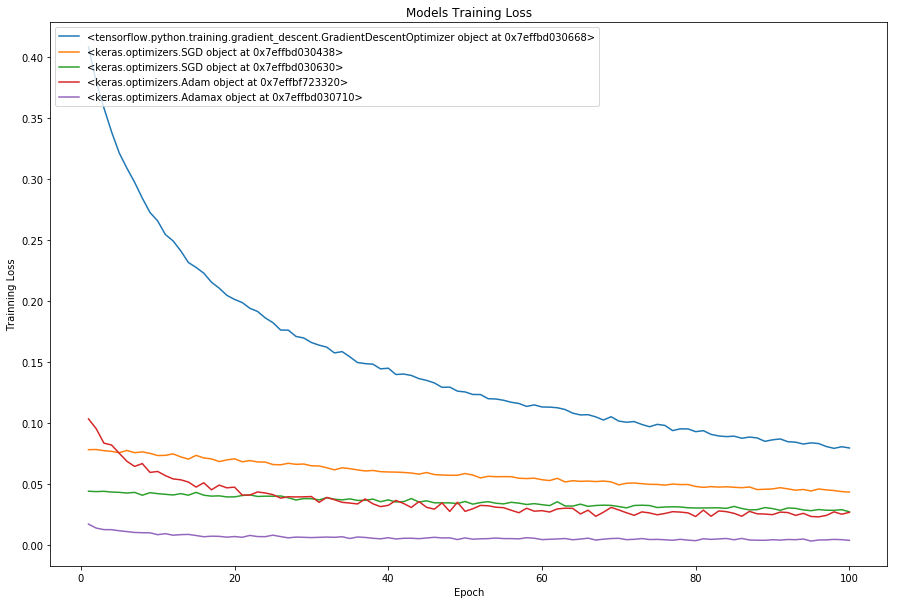

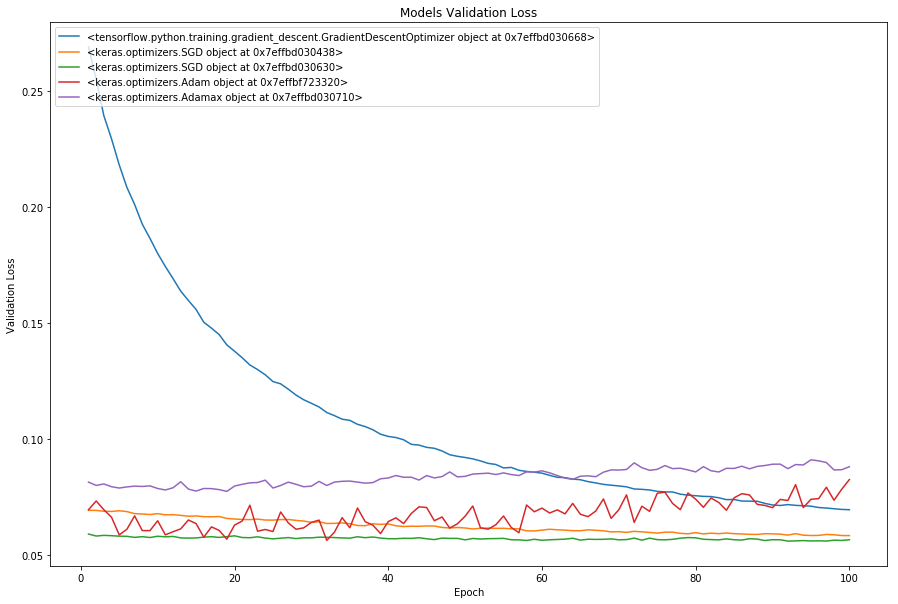

In [20]:
#Compare trainning losses

plt.figure(figsize=(15,10))

plt.plot(range(1, epochs+1), historyGD.history['loss'])
plt.plot(range(1, epochs+1), historySGD.history['loss'])
plt.plot(range(1, epochs+1), historySGDMomentum.history['loss'])
plt.plot(range(1, epochs+1), historyAdam.history['loss'])
plt.plot(range(1, epochs+1), historyAdamax.history['loss'])
    
plt.title('Models Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Trainning Loss')
plt.legend(optimizers, loc='upper left')

#Compare validation losses

plt.figure(figsize=(15,10))

plt.plot(range(1, epochs+1), historyGD.history['val_loss'])
plt.plot(range(1, epochs+1), historySGD.history['val_loss'])
plt.plot(range(1, epochs+1), historySGDMomentum.history['val_loss'])
plt.plot(range(1, epochs+1), historyAdam.history['val_loss'])
plt.plot(range(1, epochs+1), historyAdamax.history['val_loss'])
    
plt.title('Models Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(optimizers, loc='upper left')

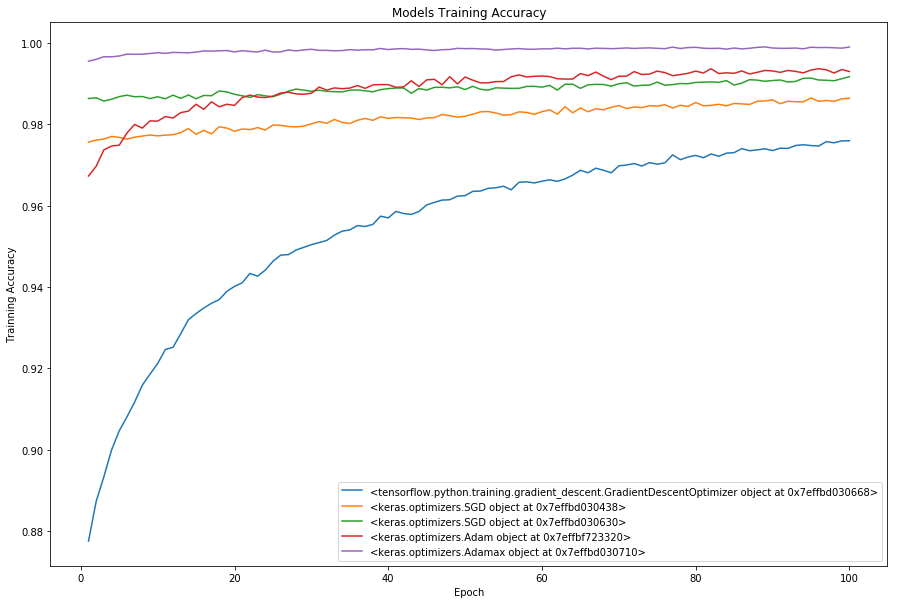

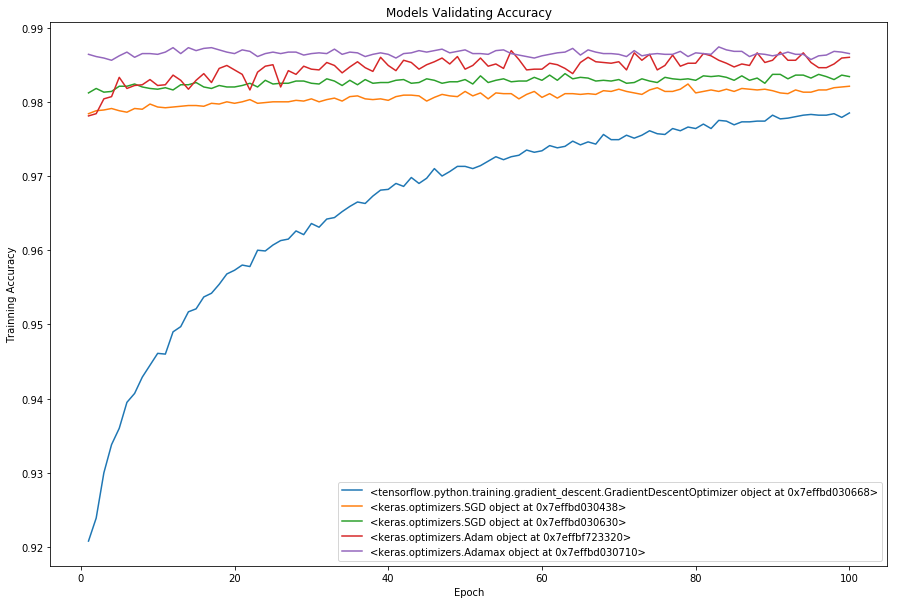

In [24]:
#Compare trainning accuracy

plt.figure(figsize=(15,10))

plt.plot(range(1, epochs+1), historyGD.history['acc'])
plt.plot(range(1, epochs+1), historySGD.history['acc'])
plt.plot(range(1, epochs+1), historySGDMomentum.history['acc'])
plt.plot(range(1, epochs+1), historyAdam.history['acc'])
plt.plot(range(1, epochs+1), historyAdamax.history['acc'])
    
plt.title('Models Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Trainning Accuracy')
plt.legend(optimizers, loc='lower right')

#Validating Accuracy
plt.figure(figsize=(15,10))

plt.plot(range(1, epochs+1), historyGD.history['val_acc'])
plt.plot(range(1, epochs+1), historySGD.history['val_acc'])
plt.plot(range(1, epochs+1), historySGDMomentum.history['val_acc'])
plt.plot(range(1, epochs+1), historyAdam.history['val_acc'])
plt.plot(range(1, epochs+1), historyAdamax.history['val_acc'])
    
plt.title('Models Validating Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Trainning Accuracy')
plt.legend(optimizers, loc='lower right')

In [ ]:
#Compare trainning and validating accuracy



In [15]:
batch_size = 128
epochs = 5

sgd_mon = keras.optimizers.SGD(lr=0.01, momentum=0.1, decay=0.0, nesterov=False)

model.compile(loss='categorical_crossentropy',
                  optimizer=sgd_mon,
                  metrics=['accuracy'])

history = model.fit(input_train, target_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1,
                    validation_data=(input_test, target_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.3086 - acc: 0.9084 - val_loss: 0.2098 - val_acc: 0.9394
Epoch 2/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.2958 - acc: 0.9129 - val_loss: 0.2021 - val_acc: 0.9406
Epoch 3/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.2827 - acc: 0.9169 - val_loss: 0.1941 - val_acc: 0.9422
Epoch 4/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.2738 - acc: 0.9203 - val_loss: 0.1852 - val_acc: 0.9452
Epoch 5/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.2628 - acc: 0.9225 - val_loss: 0.1795 - val_acc: 0.9461


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 10s 172us/step - loss: 0.1059 - acc: 0.9881 - val_loss: 0.1550 - val_acc: 0.9847
Epoch 2/100
60000/60000 [==============================] - 9s 158us/step - loss: 0.1005 - acc: 0.9881 - val_loss: 0.1514 - val_acc: 0.9846
Epoch 3/100
60000/60000 [==============================] - 10s 159us/step - loss: 0.0909 - acc: 0.9894 - val_loss: 0.1502 - val_acc: 0.9849
Epoch 4/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.0865 - acc: 0.9901 - val_loss: 0.1503 - val_acc: 0.9849
Epoch 5/100
60000/60000 [==============================] - 10s 160us/step - loss: 0.0889 - acc: 0.9897 - val_loss: 0.1477 - val_acc: 0.9848
Epoch 6/100
60000/60000 [==============================] - 10s 161us/step - loss: 0.0859 - acc: 0.9895 - val_loss: 0.1463 - val_acc: 0.9848
Epoch 7/100
60000/60000 [==============================] - 10s 160us/step - loss: 0.0795 - acc: 0.9902 - val_lo

Epoch 59/100
60000/60000 [==============================] - 9s 158us/step - loss: 0.0485 - acc: 0.9936 - val_loss: 0.1296 - val_acc: 0.9858
Epoch 60/100
60000/60000 [==============================] - 10s 167us/step - loss: 0.0455 - acc: 0.9939 - val_loss: 0.1274 - val_acc: 0.9856
Epoch 61/100
60000/60000 [==============================] - 8s 137us/step - loss: 0.0485 - acc: 0.9936 - val_loss: 0.1290 - val_acc: 0.9856
Epoch 62/100
60000/60000 [==============================] - 8s 140us/step - loss: 0.0484 - acc: 0.9939 - val_loss: 0.1290 - val_acc: 0.9854
Epoch 63/100
60000/60000 [==============================] - 8s 141us/step - loss: 0.0488 - acc: 0.9932 - val_loss: 0.1283 - val_acc: 0.9855
Epoch 64/100
60000/60000 [==============================] - 8s 140us/step - loss: 0.0487 - acc: 0.9935 - val_loss: 0.1286 - val_acc: 0.9856
Epoch 65/100
60000/60000 [==============================] - 8s 139us/step - loss: 0.0507 - acc: 0.9932 - val_loss: 0.1275 - val_acc: 0.9853
Epoch 66/100
60000/

60000/60000 [==============================] - 9s 154us/step - loss: 0.0352 - acc: 0.9970 - val_loss: 0.1807 - val_acc: 0.9860
Epoch 76/100
60000/60000 [==============================] - 9s 150us/step - loss: 0.0316 - acc: 0.9971 - val_loss: 0.1804 - val_acc: 0.9863
Epoch 77/100
60000/60000 [==============================] - 9s 153us/step - loss: 0.0332 - acc: 0.9970 - val_loss: 0.1795 - val_acc: 0.9868
Epoch 78/100
60000/60000 [==============================] - 9s 150us/step - loss: 0.0317 - acc: 0.9972 - val_loss: 0.1703 - val_acc: 0.9873
Epoch 79/100
60000/60000 [==============================] - 9s 154us/step - loss: 0.0333 - acc: 0.9970 - val_loss: 0.1688 - val_acc: 0.9868
Epoch 80/100
60000/60000 [==============================] - 9s 153us/step - loss: 0.0340 - acc: 0.9971 - val_loss: 0.1690 - val_acc: 0.9868
Epoch 81/100
60000/60000 [==============================] - 9s 150us/step - loss: 0.0377 - acc: 0.9967 - val_loss: 0.1706 - val_acc: 0.9863
Epoch 82/100
60000/60000 [=======

60000/60000 [==============================] - 14s 233us/step - loss: 0.0213 - acc: 0.9979 - val_loss: 0.1696 - val_acc: 0.9861
Epoch 92/100
60000/60000 [==============================] - 15s 246us/step - loss: 0.0220 - acc: 0.9981 - val_loss: 0.1692 - val_acc: 0.9860
Epoch 93/100
60000/60000 [==============================] - 11s 179us/step - loss: 0.0217 - acc: 0.9980 - val_loss: 0.1696 - val_acc: 0.9861
Epoch 94/100
60000/60000 [==============================] - 10s 172us/step - loss: 0.0175 - acc: 0.9982 - val_loss: 0.1707 - val_acc: 0.9862
Epoch 95/100
60000/60000 [==============================] - 11s 187us/step - loss: 0.0218 - acc: 0.9980 - val_loss: 0.1699 - val_acc: 0.9860
Epoch 96/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0204 - acc: 0.9981 - val_loss: 0.1718 - val_acc: 0.9860
Epoch 97/100
60000/60000 [==============================] - 11s 184us/step - loss: 0.0207 - acc: 0.9981 - val_loss: 0.1705 - val_acc: 0.9861
Epoch 98/100
60000/60000 [

Epoch 49/100
60000/60000 [==============================] - 12s 204us/step - loss: 0.0198 - acc: 0.9981 - val_loss: 0.1612 - val_acc: 0.9864
Epoch 50/100
60000/60000 [==============================] - 12s 202us/step - loss: 0.0192 - acc: 0.9980 - val_loss: 0.1627 - val_acc: 0.9865
Epoch 51/100
60000/60000 [==============================] - 12s 203us/step - loss: 0.0199 - acc: 0.9980 - val_loss: 0.1641 - val_acc: 0.9866
Epoch 52/100
60000/60000 [==============================] - 12s 202us/step - loss: 0.0217 - acc: 0.9978 - val_loss: 0.1625 - val_acc: 0.9864
Epoch 53/100
60000/60000 [==============================] - 12s 208us/step - loss: 0.0234 - acc: 0.9978 - val_loss: 0.1610 - val_acc: 0.9866
Epoch 54/100
60000/60000 [==============================] - 12s 207us/step - loss: 0.0235 - acc: 0.9980 - val_loss: 0.1600 - val_acc: 0.9866
Epoch 55/100
60000/60000 [==============================] - 12s 203us/step - loss: 0.0193 - acc: 0.9981 - val_loss: 0.1596 - val_acc: 0.9867
Epoch 56/100


Epoch 7/100
60000/60000 [==============================] - 11s 184us/step - loss: 0.0469 - acc: 0.9955 - val_loss: 0.1666 - val_acc: 0.9858
Epoch 8/100
60000/60000 [==============================] - 11s 186us/step - loss: 0.0525 - acc: 0.9950 - val_loss: 0.1469 - val_acc: 0.9866
Epoch 9/100
60000/60000 [==============================] - 11s 180us/step - loss: 0.0485 - acc: 0.9953 - val_loss: 0.1679 - val_acc: 0.9864
Epoch 10/100
60000/60000 [==============================] - 11s 184us/step - loss: 0.0464 - acc: 0.9957 - val_loss: 0.1702 - val_acc: 0.9854
Epoch 11/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.0503 - acc: 0.9951 - val_loss: 0.1690 - val_acc: 0.9861
Epoch 12/100
60000/60000 [==============================] - 11s 187us/step - loss: 0.0552 - acc: 0.9950 - val_loss: 0.1701 - val_acc: 0.9862
Epoch 13/100
60000/60000 [==============================] - 11s 190us/step - loss: 0.0520 - acc: 0.9950 - val_loss: 0.1662 - val_acc: 0.9857
Epoch 14/100
600

Epoch 23/100
60000/60000 [==============================] - 14s 233us/step - loss: 0.0246 - acc: 0.9973 - val_loss: 0.1629 - val_acc: 0.9859
Epoch 24/100
60000/60000 [==============================] - 12s 204us/step - loss: 0.0202 - acc: 0.9978 - val_loss: 0.1625 - val_acc: 0.9858
Epoch 25/100
60000/60000 [==============================] - 17s 280us/step - loss: 0.0224 - acc: 0.9977 - val_loss: 0.1652 - val_acc: 0.9856
Epoch 26/100
60000/60000 [==============================] - 13s 213us/step - loss: 0.0278 - acc: 0.9971 - val_loss: 0.1641 - val_acc: 0.9856
Epoch 27/100
60000/60000 [==============================] - 15s 243us/step - loss: 0.0230 - acc: 0.9978 - val_loss: 0.1632 - val_acc: 0.9857
Epoch 28/100
60000/60000 [==============================] - 13s 209us/step - loss: 0.0213 - acc: 0.9976 - val_loss: 0.1617 - val_acc: 0.9856
Epoch 29/100
60000/60000 [==============================] - 15s 247us/step - loss: 0.0231 - acc: 0.9978 - val_loss: 0.1609 - val_acc: 0.9858
Epoch 30/100


Epoch 39/100
60000/60000 [==============================] - 12s 198us/step - loss: 0.2402 - acc: 0.9840 - val_loss: 0.2673 - val_acc: 0.9828
Epoch 40/100
60000/60000 [==============================] - 13s 223us/step - loss: 0.2184 - acc: 0.9854 - val_loss: 0.2378 - val_acc: 0.9844
Epoch 41/100
60000/60000 [==============================] - 13s 218us/step - loss: 0.2325 - acc: 0.9847 - val_loss: 0.2580 - val_acc: 0.9831
Epoch 42/100
60000/60000 [==============================] - 13s 212us/step - loss: 0.2411 - acc: 0.9842 - val_loss: 0.2511 - val_acc: 0.9836
Epoch 43/100
60000/60000 [==============================] - 12s 197us/step - loss: 0.2387 - acc: 0.9843 - val_loss: 0.2630 - val_acc: 0.9830
Epoch 44/100
60000/60000 [==============================] - 12s 197us/step - loss: 0.2678 - acc: 0.9820 - val_loss: 0.2613 - val_acc: 0.9831
Epoch 45/100
60000/60000 [==============================] - 12s 196us/step - loss: 0.2673 - acc: 0.9823 - val_loss: 0.2701 - val_acc: 0.9824
Epoch 46/100


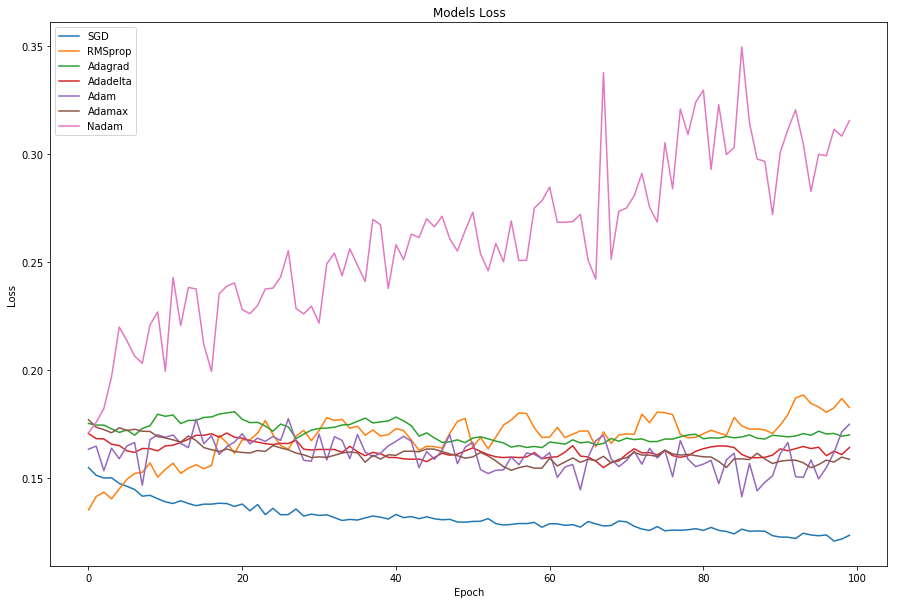

In [13]:
batch_size = 128
epochs = 5
plt.figure(figsize=(15,10))
for optimizer in ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']:
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    history = model.fit(input_train, target_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        verbose=1,
                        validation_data=(input_test, target_test))
    
    plt.plot(history.history['val_loss'])

plt.title('Models Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'], loc='upper left')

In [1]:
score = model.evaluate(input_test, target_test, verbose=1)
print(score)

NameError: name 'model' is not defined